In [1]:
# analyze the data update record for API Server schedule optimization

# imports

import pandas as pd
import sys

# set up file paths and other data globals

import config, modify

sys.path.append(config.CURRENT_DIR_STR)
sys.path.append(config.COVID_PACKAGE_STR)
sys.path.append(config.UPDATE_FILE_STR)

# local imports
from covid_package.data_funcs.store_data import read_json_data
from covid_package.data_funcs.datetime_funcs import convert_datetime_str_to_obj
from covid_package.plots.plot_results import scatter_plot

In [2]:
# read the update_record.json file
updata = read_json_data(config.UPDATE_FILE_STR)

# get the update datetime list
update_list = updata['update_list']

In [3]:
# organize the pandas column data

update_dict = {
    'datetime_strings': update_list,
    'day_nums': [convert_datetime_str_to_obj(i, 'day_num') for i in update_list], 
    'days': [convert_datetime_str_to_obj(i, 'day') for i in update_list], 
    'hours': list(map(int, [convert_datetime_str_to_obj(i, 'hour') for i in update_list])), 
    'minutes': list(map(int, [convert_datetime_str_to_obj(i, 'minute') for i in update_list]))
    }

In [4]:
# create the dataframe
df = pd.DataFrame(update_dict)
df

,datetime_strings,day_nums,days,hours,minutes
0,2021-04-01T14:40:33Z,4,Thursday,14,40
1,2021-04-03T09:02:46Z,6,Saturday,9,2
2,2021-04-04T08:02:44Z,7,Sunday,8,2
3,2021-04-05T13:02:56Z,1,Monday,13,2
4,2021-04-06T18:02:52Z,2,Tuesday,18,2
...,...,...,...,...,...
85,2021-05-18T12:06:1Z,2,Tuesday,12,6
86,2021-05-19T09:47:2Z,3,Wednesday,9,47
87,2021-05-19T15:03:2Z,3,Wednesday,15,3
88,2021-05-20T05:02:5Z,4,Thursday,5,2


In [5]:
# boil down the data for analysis by day of the week and hours of the day
hc = df.groupby(['day_nums', 'days', 'hours']).size().reset_index(name='counts')
hc

,day_nums,days,hours,counts
0,1,Monday,5,6
1,1,Monday,13,2
2,1,Monday,14,3
3,1,Monday,15,1
4,1,Monday,16,1
5,1,Monday,19,1
6,1,Monday,20,1
7,2,Tuesday,5,2
8,2,Tuesday,9,1
9,2,Tuesday,12,1


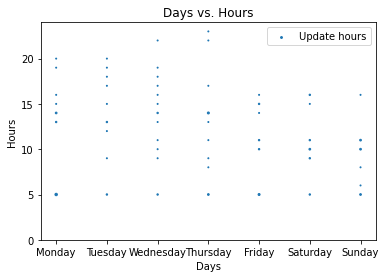

In [6]:

labels = {
    'title': 'Days vs. Hours',
    'x_label': 'Days',
    'y_label': 'Hours'
}

results = {
    'x_axis': hc['days'],
    'y_axis': hc['hours'],
    'legend_label': 'Update hours'
}

params = {
    'y_lim': (0, 24),
    'area': hc['counts'],
    'colors': None,
    'alpha': None
}

scatter_plot(labels, results, params)

In [7]:
# boil down the data for analysis by day of the week and hours of the day
mc = df.groupby(['hours', 'minutes']).size().reset_index(name='counts')
mc

,hours,minutes,counts
0,5,2,18
1,5,3,4
2,6,3,1
3,8,2,1
4,8,49,1
...,...,...,...
56,19,23,1
57,20,2,2
58,22,19,1
59,22,24,1


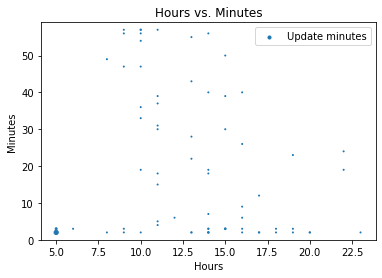

In [8]:
labels = {
    'title': 'Hours vs. Minutes',
    'x_label': 'Hours',
    'y_label': 'Minutes'
}

results = {
    'x_axis': mc['hours'],
    'y_axis': mc['minutes'],
    'legend_label': 'Update minutes'
}

params = {
    'y_lim': (0, 59),
    'area': mc['counts'],
    'colors': None,
    'alpha': None
}

scatter_plot(labels, results, params)